# Feed-Forward Neural Networks

Tabular data

In [1]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

### Tensorflow 

In [2]:
import tensorflow as tf

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# Check for GPU availability
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


2024-05-29 09:56:42.054930: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-29 09:56:42.061239: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-29 09:56:42.145924: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-29 09:56:43.524742: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


TensorFlow version: 2.16.1
Num GPUs Available:  0


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Dataset

In [4]:
annotations_path = 'dataset/density_info.csv'
dataset_path = 'dataset/GLCM/GLCM_dataset.csv'

In [5]:
annotations_df = pd.read_csv(annotations_path)
glcm_df = pd.read_csv(dataset_path)

In [6]:
annotations_df

,id,file_path,image_path,SeriesDescription,patient_id,image view,breast density
0,0,1.3.6.1.4.1.9590.100.1.2.239949064412092068706...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.239949...,full mammogram images,P_00017,MLO,2
1,1,1.3.6.1.4.1.9590.100.1.2.397840223011442643919...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.397840...,full mammogram images,P_00238,CC,3
2,2,1.3.6.1.4.1.9590.100.1.2.204033481911004862841...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.204033...,full mammogram images,P_00699,CC,3
3,3,1.3.6.1.4.1.9590.100.1.2.179488205110519665924...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.179488...,full mammogram images,P_01617,CC,2
4,4,1.3.6.1.4.1.9590.100.1.2.151178406511629586605...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.151178...,full mammogram images,P_00464,MLO,3
...,...,...,...,...,...,...,...
3281,3281,1.3.6.1.4.1.9590.100.1.2.206174998211439771426...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.206174...,full mammogram images,P_00322,MLO,2
3282,3282,1.3.6.1.4.1.9590.100.1.2.211427675111583558805...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.211427...,full mammogram images,P_00019,MLO,4
3283,3283,1.3.6.1.4.1.9590.100.1.2.529156274123405251229...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.529156...,full mammogram images,P_01040,CC,3
3284,3284,1.3.6.1.4.1.9590.100.1.2.744141121110160190397...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.744141...,full mammogram images,P_01462,CC,2


In [7]:
glcm_df

,id,image_path,ASM_0,correlation_0,dissimilarity_0,homogeneity_0,contrast_0,ASM_1,correlation_1,dissimilarity_1,...,homogeneity_2,contrast_2,ASM_3,correlation_3,dissimilarity_3,homogeneity_3,contrast_3,entropy,view,density
0,0,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.239949...,0.000060,0.919219,19.823437,0.058807,679.669301,0.000055,0.899927,21.984344,...,0.051649,914.332950,0.000041,0.796236,31.771795,0.036988,1712.944391,7.927204,MLO,2
1,1,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.397840...,0.000078,0.932134,15.758640,0.068536,427.249847,0.000064,0.894409,19.719170,...,0.064644,503.003140,0.000063,0.891454,20.004721,0.054418,682.401430,7.806423,CC,3
2,2,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.204033...,0.000113,0.958115,11.353278,0.102520,245.717647,0.000078,0.902425,17.306974,...,0.084095,400.147105,0.000085,0.920868,15.573872,0.076014,462.302637,7.767559,CC,3
3,3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.179488...,0.000069,0.913868,17.938725,0.067583,583.519332,0.000052,0.838011,24.724598,...,0.062652,704.519531,0.000056,0.859163,22.884829,0.054682,952.034233,7.838326,CC,2
4,4,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.151178...,0.000077,0.949262,14.990456,0.077173,397.473300,0.000062,0.917030,19.082722,...,0.062199,634.111167,0.000050,0.865504,24.573656,0.047939,1052.476678,7.907911,MLO,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,3281,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.206174...,0.000079,0.943011,15.052145,0.075168,407.463450,0.000068,0.918087,17.887443,...,0.069317,539.656740,0.000056,0.876004,22.378577,0.050890,885.111065,7.863990,MLO,2
3282,3282,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.211427...,0.000083,0.956561,13.679136,0.084714,342.405300,0.000065,0.926957,17.968643,...,0.067305,507.122044,0.000056,0.894525,21.545790,0.053552,830.344129,7.912320,MLO,4
3283,3283,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.529156...,0.000083,0.960226,13.401118,0.083634,315.865089,0.000065,0.931331,17.739746,...,0.082715,316.419868,0.000067,0.936280,17.020900,0.066712,504.990204,7.918697,CC,3
3284,3284,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.744141...,0.000056,0.888072,21.800322,0.051935,808.409482,0.000046,0.814763,28.103468,...,0.049032,939.963894,0.000046,0.821427,27.653856,0.041327,1288.598847,7.861434,CC,2


In [8]:
# merge class 2 and 3
glcm_df['density'] = glcm_df['density'].replace(3, 2)

# undersample the majority class
# n = 1500
# glcm_df = glcm_df.drop(glcm_df[glcm_df['density'] == 2].sample(n = n, random_state=1).index)

# divide the dataset into CC and MLO views
glcm_cc_df = glcm_df[glcm_df['view'] == 'CC']
glcm_mlo_df = glcm_df[glcm_df['view'] == 'MLO']

# drop non-feature columns
glcm_df = glcm_df.drop(columns=['id', 'image_path', 'view'])
glcm_cc_df = glcm_cc_df.drop(columns=['id', 'image_path', 'view'])
glcm_mlo_df = glcm_mlo_df.drop(columns=['id', 'image_path', 'view'])

In [9]:
glcm_df

,ASM_0,correlation_0,dissimilarity_0,homogeneity_0,contrast_0,ASM_1,correlation_1,dissimilarity_1,homogeneity_1,contrast_1,...,dissimilarity_2,homogeneity_2,contrast_2,ASM_3,correlation_3,dissimilarity_3,homogeneity_3,contrast_3,entropy,density
0,0.000060,0.919219,19.823437,0.058807,679.669301,0.000055,0.899927,21.984344,0.054299,841.248012,...,23.044133,0.051649,914.332950,0.000041,0.796236,31.771795,0.036988,1712.944391,7.927204,2
1,0.000078,0.932134,15.758640,0.068536,427.249847,0.000064,0.894409,19.719170,0.054698,663.816917,...,17.110340,0.064644,503.003140,0.000063,0.891454,20.004721,0.054418,682.401430,7.806423,2
2,0.000113,0.958115,11.353278,0.102520,245.717647,0.000078,0.902425,17.306974,0.068856,570.055486,...,14.369378,0.084095,400.147105,0.000085,0.920868,15.573872,0.076014,462.302637,7.767559,2
3,0.000069,0.913868,17.938725,0.067583,583.519332,0.000052,0.838011,24.724598,0.049348,1095.025559,...,19.626210,0.062652,704.519531,0.000056,0.859163,22.884829,0.054682,952.034233,7.838326,2
4,0.000077,0.949262,14.990456,0.077173,397.473300,0.000062,0.917030,19.082722,0.060307,649.260346,...,18.922013,0.062199,634.111167,0.000050,0.865504,24.573656,0.047939,1052.476678,7.907911,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,0.000079,0.943011,15.052145,0.075168,407.463450,0.000068,0.918087,17.887443,0.066273,584.687566,...,17.216268,0.069317,539.656740,0.000056,0.876004,22.378577,0.050890,885.111065,7.863990,2
3282,0.000083,0.956561,13.679136,0.084714,342.405300,0.000065,0.926957,17.968643,0.064967,575.042599,...,16.846768,0.067305,507.122044,0.000056,0.894525,21.545790,0.053552,830.344129,7.912320,4
3283,0.000083,0.960226,13.401118,0.083634,315.865089,0.000065,0.931331,17.739746,0.063561,544.215317,...,13.476149,0.082715,316.419868,0.000067,0.936280,17.020900,0.066712,504.990204,7.918697,2
3284,0.000056,0.888072,21.800322,0.051935,808.409482,0.000046,0.814763,28.103468,0.040864,1336.694225,...,23.538710,0.049032,939.963894,0.000046,0.821427,27.653856,0.041327,1288.598847,7.861434,2


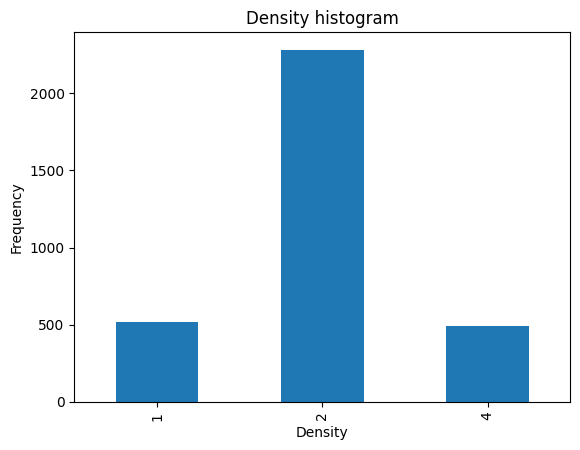

In [10]:
glcm_df['density'].value_counts().sort_index().plot(kind='bar')

plt.title('Density histogram')
plt.xlabel('Density')
plt.ylabel('Frequency')

plt.show()

## Classification

## Preparation

In [11]:
X = glcm_df.drop(columns=['density'])
y = glcm_df['density']

y = y - 1
y = y.replace(3, 2)

input_size = X.shape[1]
output_size = len(y.unique())

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Architecture

In [12]:
def create_model():

    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_size,), name='input'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(output_size, activation='softmax', name='density')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

                  
    return model

In [13]:
model = create_model()

model.summary()

/home/mikel/code/BreastDensity/env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ density (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,427 (60.26 KB)

 Trainable params: 15,427 (60.26 KB)

 Non-trainable params: 0 (0.00 B)

## Simple Training (80/20 split)

In [14]:
start = time.time()
history = model.fit(x_train, y_train, epochs = 1200, batch_size = 32, validation_data=(x_test, y_test), verbose=2)
end = time.time() - start

Epoch 1/1200


83/83 - 1s - 13ms/step - accuracy: 0.5586 - loss: 6.5388 - val_accuracy: 0.5182 - val_loss: 1.7238
Epoch 2/1200
83/83 - 0s - 2ms/step - accuracy: 0.5936 - loss: 1.5841 - val_accuracy: 0.1854 - val_loss: 3.0380
Epoch 3/1200
83/83 - 0s - 1ms/step - accuracy: 0.6016 - loss: 1.7493 - val_accuracy: 0.1839 - val_loss: 2.2853
Epoch 4/1200
83/83 - 0s - 1ms/step - accuracy: 0.5959 - loss: 1.4349 - val_accuracy: 0.6945 - val_loss: 0.8436
Epoch 5/1200
83/83 - 0s - 1ms/step - accuracy: 0.5928 - loss: 1.8299 - val_accuracy: 0.5380 - val_loss: 1.1596
Epoch 6/1200
83/83 - 0s - 1ms/step - accuracy: 0.6172 - loss: 1.4160 - val_accuracy: 0.7052 - val_loss: 1.1084
Epoch 7/1200
83/83 - 0s - 1ms/step - accuracy: 0.6138 - loss: 1.2466 - val_accuracy: 0.7052 - val_loss: 1.6724
Epoch 8/1200
83/83 - 0s - 1ms/step - accuracy: 0.6347 - loss: 1.2263 - val_accuracy: 0.4970 - val_loss: 1.1235
Epoch 9/1200
83/83 - 0s - 1ms/step - accuracy: 0.6651 - loss: 0.8697 - val_accuracy: 0.7143 - val_loss: 0.6971
Epoch 10/1200

In [15]:
print('Training time:', end)

Training time: 230.68102526664734


In [16]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

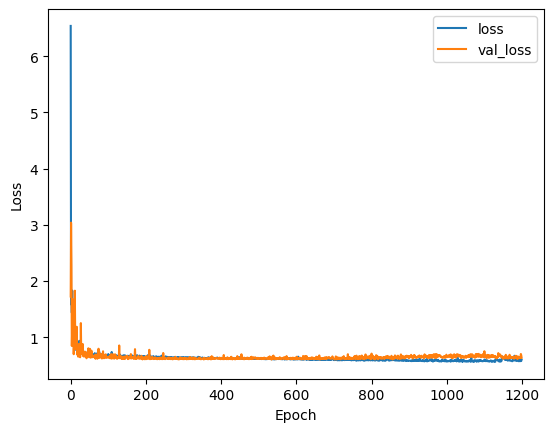

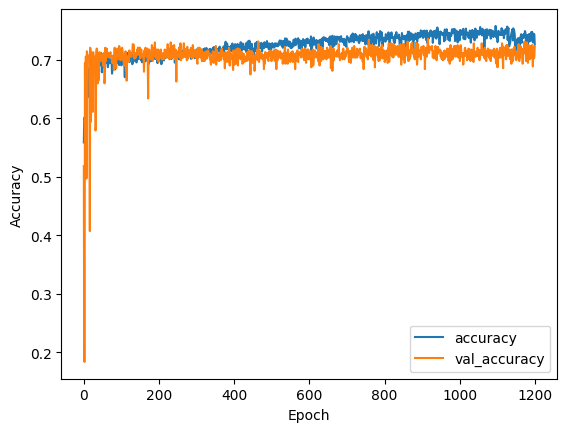

In [17]:
# Plot the loss

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [18]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)

21/21 - 0s - 3ms/step - accuracy: 0.7219 - loss: 0.6364
